# Testing the model Externally 

## Loading the Pre-Trained Model

In [3]:
import tensorflow as tf
json_file = open('Covid_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("Covid_model.h5")
print("Loaded model from disk")

Loaded model from disk


## Compiling the Loaded Model to use it

In [4]:
loaded_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print("Model Compiled Succesfuly 👍🏻")

Model Compiled Succesfuly 👍🏻


## Importing all the Necessary Libraries for pre-processing of image before passing it for prediction

In [5]:
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Training and Test data generator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5518 images belonging to 2 classes.
Found 953 images belonging to 2 classes.


## Testing the Model

### Passing Random Chest-Xray Stored at my system locally

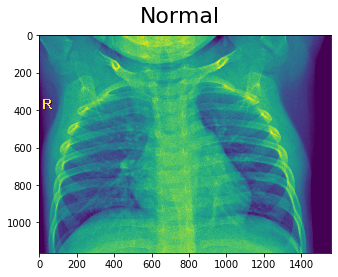

In [9]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/normal.jpeg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = loaded_model.predict(img_pred)



if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

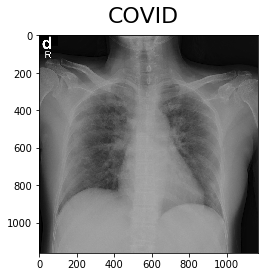

In [10]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/chest_xray/single_covid_19/covid19.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = loaded_model.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

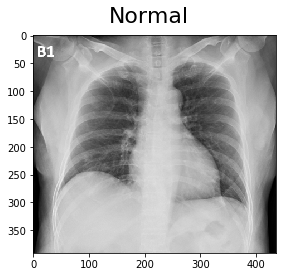

In [11]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300682-main.pdf-003-b1.png'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300682-main.pdf-003-b1.png', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = loaded_model.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

(1, 64, 64, 3)

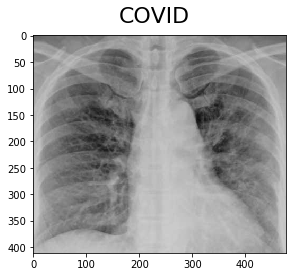

In [12]:
img_src = '/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300608-main.pdf-001.jpg'
img = cv2.imread(img_src)

img_pred = image.load_img('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300608-main.pdf-001.jpg', target_size = (64, 64))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = loaded_model.predict(img_pred)

ind = training_set.class_indices

if rslt[0][0] == 1:
    prediction = "Normal"
else:
    prediction = "COVID"

target_width = 60
target_height = 60
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=22)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)
img_pred.shape

### Creating a Prediction function that does all the preprocessing and then passes the image to predict

In [25]:
def covid_pred(link):
    img_src = link
    img = cv2.imread(img_src)

    img_pred = image.load_img(link, target_size = (64, 64))
    img_pred = image.img_to_array(img_pred)
    print(img_pred.shape)
    img_pred = np.expand_dims(img_pred, axis = 0)
    print(img_pred.shape)
    rslt = loaded_model.predict(img_pred)


    if rslt[0][0] == 1:
        prediction = "Normal"
    else:
        prediction = "COVID"

#     target_width = 64
#     target_height = 64
#     target_size = (target_width, target_height)

#     img = cv2.resize(img, target_size)
#     img = img.reshape(1, target_width, target_height, 3)


    fig, ax = plt.subplots()
    fig.suptitle(prediction, fontsize=22)

    np_img = mpimg.imread(img_src)
    print('RESULT: ')
    plt.imshow(np_img)


    

In [59]:
def covid_pred_1(link):
    img_src = link
    img = cv2.imread(img_src)
    print(img.shape)

    img_pred = image.load_img(link, target_size = (64, 64))
    print(img_pred.size)
    img_pred = image.img_to_array(img_pred)
    print(img_pred.shape)
    img_pred = np.expand_dims(img_pred, axis = 0)
    print(img_pred.shape)
    rslt = loaded_model.predict(img_pred)


    if rslt[0][0] == 1:
        prediction = "Normal"
    else:
        prediction = "COVID"

    target_width = 64
    target_height = 64
    target_size = (target_width, target_height)

    img = cv2.resize(img, target_size)
    img = img.reshape(1, target_width, target_height, 3)
    print(img.shape)


    fig, ax = plt.subplots()
    fig.suptitle(prediction, fontsize=22)

    np_img = mpimg.imread(img_src)
    print('RESULT: ')
    plt.imshow(np_img)


    

#### Checking the working of above created function 

(391, 436, 3)
(64, 64)
(64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
RESULT: 


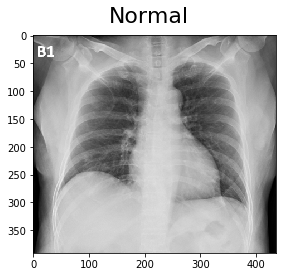

In [60]:
covid_pred_1('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300682-main.pdf-003-b1.png')

(64, 64, 3)
(1, 64, 64, 3)
RESULT: 


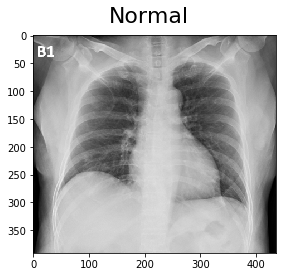

In [41]:
covid_pred('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300682-main.pdf-003-b1.png')

RESULT: 


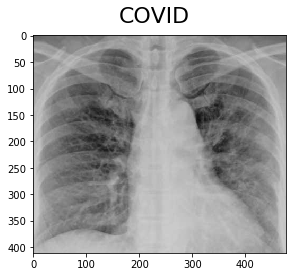

In [9]:
covid_pred('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidAID/covid-chestxray-dataset/images/1-s2.0-S1684118220300608-main.pdf-001.jpg')

(64, 64, 3)
(1, 64, 64, 3)
RESULT: 


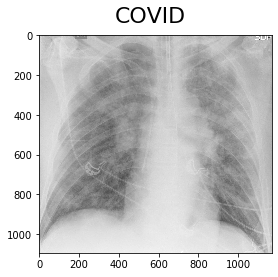

In [52]:
covid_pred('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Covid/B2D20576-00B7-4519-A415-72DE29C90C34.jpeg')

In [56]:
from PIL import Image, ImageOps
fed_img=ImageOps.fit('/Users/rakshitbatra/Desktop/Covid-19_Detection/CovidDataset/Val/Covid/B2D20576-00B7-4519-A415-72DE29C90C34.jpeg', size=(64,64))
img = np.asarray(fed_img)
pred_img = np.expand_dims(img, axis = 0)


AttributeError: 'str' object has no attribute 'size'